In [14]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [6]:
#Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import gensim
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [15]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [16]:
#Functions to process Date,Year and Month
def to_date(val):
    return datetime.strptime( str(val),'%Y-%m-%d %H:%M:%S+00:00')
def to_year(val):
    return val.strftime('%Y')
def to_yr_mon(val):
    return val.strftime('%Y-%m')

Answers DataFrame

In [17]:
answers = pd.read_csv(r"C:\Users\meril\Desktop\Capstone\answers.csv")

In [18]:
answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51123 entries, 0 to 51122
Data columns (total 5 columns):
answers_id             51123 non-null object
answers_author_id      51123 non-null object
answers_question_id    51123 non-null object
answers_date_added     51123 non-null object
answers_body           51122 non-null object
dtypes: object(5)
memory usage: 2.0+ MB


In [19]:
answers.describe().T

,count,unique,top,freq
answers_id,51123,51123,1ca6bbf1da9c4f8fa2f59c52d99d2a3f,1
answers_author_id,51123,10169,36ff3b3666df400f956f8335cf53e09e,1710
answers_question_id,51123,23110,8eb6ba7af57846acbfec5633e537192a,58
answers_date_added,51123,51062,2017-10-13 17:42:30 UTC+0000,2
answers_body,51122,50401,"<p>&lt;span style=""background-color: transparent;""&gt;Collegeboard.org is a great resource for this! I poured through the pages of universities all over the U.S. when I was a senior in high school. Collegeboard was my go-to site! They put all of the information in one place and it is very easy to use. They even have various filters you can apply to see only colleges that have programs you are interested. To determine academic rigor, look at the admissions requirements, G.P.A. of past admitted applicants, SAT/ACT scores, class rank etc. This will give you an idea of what scores and grades you need to be accepted. However, don't be discouraged your application will be reviewed based on the full picture! College-board will help you get an idea of what is most important to the specific school you are applying to.&lt;/span&gt;</p><p><br></p><p><em>This professional recommends the following </em><a href=""https://medium.com/@careervillage/introducing-next-steps-e27f907c3c6e""><em>next steps</em></a><em>:</em></p><ul><li>&lt;span style=""background-color: transparent;""&gt;Chat with your Guidance Counselor&lt;/span&gt;</li><li>&lt;span style=""background-color: transparent;""&gt;Create a Collegeboard.org account&lt;/span&gt;</li><li>&lt;span style=""background-color: transparent;""&gt;Start using CollegeBoard as a resource to look up schools.&lt;/span&gt;</li></ul><p><br></p>",103


In [20]:
answers.rename(columns = {"answers_author_id":"professionals_id","answers_question_id":"questions_id"},inplace=True)

In [21]:
answers.head(4)

,answers_id,professionals_id,questions_id,answers_date_added,answers_body
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,<p>Hi!</p>\n<p>You are asking a very interesting question. I am giving you two sites that will give you some of an explanation that may answer your question.</p>\n<p>http://mathforum.org/dr.math/faq/faq.why.math.html</p>\n<p>http://www.mathworksheetscenter.com/mathtips/mathissoimportant.html</p>\n<p>Let me know if this helps</p>
1,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,2018-05-01 14:19:08 UTC+0000,"<p>Hi. I joined the Army after I attended college and received a Bachelor's Degree in Criminal Justice. Commissioned officers enter the Military with a four year degree or receive officer training after joining and complete a tour. You can prepare yourself by taking Reserve Officer Training Corps (ROTC) while in high school or a university. You can also attend Officer Candidate School (OCS) after graduating from college or become commissioned by earning a professional degree. If you decide to earn a degree, think about what you would like to do while in the military. The experience in the military was very rewarding. I wish you well and much success in your future. </p>"
2,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,eb80205482e4424cad8f16bc25aa2d9c,2018-05-02 02:41:02 UTC+0000,"<p>Dear Priyanka,</p><p>Greetings! I have answered this question to Eshwari few days ago. I am going to reproduce that answer with bit of modifications as required for better clarity. </p><p><br></p><p>From your background, I could make out that you are from Bangalore and a student of 10th standard but your location is Rhode Island, USA. So I am not very clear as to which Army you wish to join ? Is it the US Army or the Indian Army? It is important to know that very few foreign nationals can join Indian Army (like Nepali citizens etc.). So you have to ascertain for yourself as to which citizenship you hold and accordingly you can join armed forces of the respective countries. Both are highly professional armies and respected a lot. I shall answer the modalities about the Indian Army, assuming that is the natural choice.</p><p><br></p><p>So, to answer your query, there are following options for you to become army officer:</p><ol><li> Do your B.Sc and that will be good as you have wider choices including flying branches in air force and executive branches in Navy. Similarly BA/B.Com if you are not looking for flying or executive branches. </li><li> Should you wish to be doctor in Army then you can appear for entrance Test for AFMC, Pune or Army Dental College after class 12th with PCMB. However, you can do the same by attending Medical colleges from civil institutes in India/abroad. </li><li> You can also join Military Nursing Services after B.Sc or Diploma in Nursing but majority of them are trained within army organisations (after 12th only with PCMB). </li><li> You can join after doing your graduation in Engineering (Civil, Mech, Electrical, Electronics or Computer Sciences) or Masters in Physics with Electronics or Computers for engineering branches.</li><li>You can also join in Education Corps by doing M.Sc/MA/M.Com with or without B.Ed or in Legal services by doing your Law Degree. </li></ol><p><br></p><p>After your basic education, application and selection test processes, one has to clear SSB (Services Selection Board) which is a very stringent 5 days test (compulsory for all including Women officers except medical professionals). It is one of the best methods of test I know to assess the suitability for military services (as officers), a proven method of testing of one's psyche, leadership qualities which takes all the aspects of your personality into account and decide. Although, success rate is pretty low but don't get disheartened and demotivated. Key to success in SSB

In [22]:
#Converting the string type to date type
answers["answers_date_added"] = pd.to_datetime(answers["answers_date_added"])

In [23]:
answers.head(4)

,answers_id,professionals_id,questions_id,answers_date_added,answers_body
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14+00:00,<p>Hi!</p>\n<p>You are asking a very interesting question. I am giving you two sites that will give you some of an explanation that may answer your question.</p>\n<p>http://mathforum.org/dr.math/faq/faq.why.math.html</p>\n<p>http://www.mathworksheetscenter.com/mathtips/mathissoimportant.html</p>\n<p>Let me know if this helps</p>
1,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,2018-05-01 14:19:08+00:00,"<p>Hi. I joined the Army after I attended college and received a Bachelor's Degree in Criminal Justice. Commissioned officers enter the Military with a four year degree or receive officer training after joining and complete a tour. You can prepare yourself by taking Reserve Officer Training Corps (ROTC) while in high school or a university. You can also attend Officer Candidate School (OCS) after graduating from college or become commissioned by earning a professional degree. If you decide to earn a degree, think about what you would like to do while in the military. The experience in the military was very rewarding. I wish you well and much success in your future. </p>"
2,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,eb80205482e4424cad8f16bc25aa2d9c,2018-05-02 02:41:02+00:00,"<p>Dear Priyanka,</p><p>Greetings! I have answered this question to Eshwari few days ago. I am going to reproduce that answer with bit of modifications as required for better clarity. </p><p><br></p><p>From your background, I could make out that you are from Bangalore and a student of 10th standard but your location is Rhode Island, USA. So I am not very clear as to which Army you wish to join ? Is it the US Army or the Indian Army? It is important to know that very few foreign nationals can join Indian Army (like Nepali citizens etc.). So you have to ascertain for yourself as to which citizenship you hold and accordingly you can join armed forces of the respective countries. Both are highly professional armies and respected a lot. I shall answer the modalities about the Indian Army, assuming that is the natural choice.</p><p><br></p><p>So, to answer your query, there are following options for you to become army officer:</p><ol><li> Do your B.Sc and that will be good as you have wider choices including flying branches in air force and executive branches in Navy. Similarly BA/B.Com if you are not looking for flying or executive branches. </li><li> Should you wish to be doctor in Army then you can appear for entrance Test for AFMC, Pune or Army Dental College after class 12th with PCMB. However, you can do the same by attending Medical colleges from civil institutes in India/abroad. </li><li> You can also join Military Nursing Services after B.Sc or Diploma in Nursing but majority of them are trained within army organisations (after 12th only with PCMB). </li><li> You can join after doing your graduation in Engineering (Civil, Mech, Electrical, Electronics or Computer Sciences) or Masters in Physics with Electronics or Computers for engineering branches.</li><li>You can also join in Education Corps by doing M.Sc/MA/M.Com with or without B.Ed or in Legal services by doing your Law Degree. </li></ol><p><br></p><p>After your basic education, application and selection test processes, one has to clear SSB (Services Selection Board) which is a very stringent 5 days test (compulsory for all including Women officers except medical professionals). It is one of the best methods of test I know to assess the suitability for military services (as officers), a proven method of testing of one's psyche, leadership qualities which takes all the aspects of your personality into account and decide. Although, success rate is pretty low but don't get disheartened and demotivated. Key to success in SSB is a sou

In [10]:
answers.isnull().sum()

answers_id            0
professionals_id      0
questions_id          0
answers_date_added    0
answers_body          1
dtype: int64

Comments

In [24]:
comments = pd.read_csv(r"C:\Users\meril\Desktop\Capstone\comments.csv")

In [25]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14966 entries, 0 to 14965
Data columns (total 5 columns):
comments_id                   14966 non-null object
comments_author_id            14966 non-null object
comments_parent_content_id    14966 non-null object
comments_date_added           14966 non-null object
comments_body                 14962 non-null object
dtypes: object(5)
memory usage: 584.7+ KB


In [13]:
comments.describe().T

,count,unique,top,freq
comments_id,14966,14966,7a8020c3fb4e41029ffbd93035a90790,1
comments_author_id,14966,4231,36ff3b3666df400f956f8335cf53e09e,317
comments_parent_content_id,14966,9923,4c6ae4bd2136472899c15b798eb9d3df,30
comments_date_added,14966,14905,2016-07-22 22:13:05 UTC+0000,3
comments_body,14962,11963,Thank you!,388


In [26]:
comments["comments_date_added"] = pd.to_datetime(comments["comments_date_added"])

In [27]:
comments.isnull().sum()

comments_id                   0
comments_author_id            0
comments_parent_content_id    0
comments_date_added           0
comments_body                 4
dtype: int64

Emails

In [28]:
emails = pd.read_csv(r"C:\Users\meril\Desktop\Capstone\emails.csv")

In [29]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850101 entries, 0 to 1850100
Data columns (total 4 columns):
emails_id                 int64
emails_recipient_id       object
emails_date_sent          object
emails_frequency_level    object
dtypes: int64(1), object(3)
memory usage: 56.5+ MB


In [30]:
emails.head(4)

,emails_id,emails_recipient_id,emails_date_sent,emails_frequency_level
0,2337714,0c673e046d824ec0ad0ebe012a0673e4,2018-12-07 01:05:40 UTC+0000,email_notification_daily
1,2336077,0c673e046d824ec0ad0ebe012a0673e4,2018-12-06 01:14:15 UTC+0000,email_notification_daily
2,2314660,0c673e046d824ec0ad0ebe012a0673e4,2018-11-17 00:38:27 UTC+0000,email_notification_daily
3,2312639,0c673e046d824ec0ad0ebe012a0673e4,2018-11-16 00:32:19 UTC+0000,email_notification_daily


In [ ]:
emails["emails_date_sent"] = pd.to_datetime(emails["emails_date_sent"])

In [31]:
emails.isnull().sum()

emails_id                 0
emails_recipient_id       0
emails_date_sent          0
emails_frequency_level    0
dtype: int64

group_memberships

In [32]:
group_memberships = pd.read_csv(r"C:\Users\meril\Desktop\Capstone\group_memberships.csv")

In [33]:
group_memberships.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 2 columns):
group_memberships_group_id    1038 non-null object
group_memberships_user_id     1038 non-null object
dtypes: object(2)
memory usage: 16.3+ KB


In [34]:
group_memberships.rename(columns = {"group_memberships_group_id":"groups_id","group_memberships_user_id":"user_id"},inplace=True)

In [35]:
group_memberships.head(4)

,groups_id,user_id
0,eabbdf4029734c848a9da20779637d03,9a5aead62c344207b2624dba90985dc5
1,eabbdf4029734c848a9da20779637d03,ea7122da1c7b4244a2184a4f9f944053
2,eabbdf4029734c848a9da20779637d03,cba603f34acb4a40b3ccb53fe6681b5d
3,eabbdf4029734c848a9da20779637d03,fa9a126e63714641ae0145557a390cab


In [36]:
group_memberships.isnull().sum()

groups_id    0
user_id      0
dtype: int64

Groups

In [37]:
groups= pd.read_csv(r"C:\Users\meril\Desktop\Capstone\groups.csv")

In [38]:
groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
groups_id            49 non-null object
groups_group_type    49 non-null object
dtypes: object(2)
memory usage: 912.0+ bytes


In [39]:
groups.rename(columns = {"groups_group_type":"groups_type"},inplace=True)

In [40]:
groups.tail(6)

,groups_id,groups_type
43,ab73e3e161b64543a194b46442b0f805,professional network
44,298f0e917129423d9c6b12f08d26416f,mentorship program
45,e2d6994350424f46a329cb3ba17e4893,youth program
46,66574765baa94b79a7e76b13f36a0d4a,youth program
47,a36cb039d1f4429a90a6b2c9de08dd39,professional network
48,e1a4d435bbd84deaae344c223f204742,professional network


In [41]:
groups.isnull().sum()

groups_id      0
groups_type    0
dtype: int64

Matches

In [42]:
matches= pd.read_csv(r"C:\Users\meril\Desktop\Capstone\matches.csv")

In [43]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4316275 entries, 0 to 4316274
Data columns (total 2 columns):
matches_email_id       int64
matches_question_id    object
dtypes: int64(1), object(1)
memory usage: 65.9+ MB


In [44]:
matches.rename(columns = {"matches_email_id":"emails_id","matches_question_id":"questions_id"},inplace=True)

In [45]:
matches.head()

,emails_id,questions_id
0,1721939,332a511f1569444485cf7a7a556a5e54
1,1665388,332a511f1569444485cf7a7a556a5e54
2,1636634,332a511f1569444485cf7a7a556a5e54
3,1635498,332a511f1569444485cf7a7a556a5e54
4,1620298,332a511f1569444485cf7a7a556a5e54


In [46]:
matches.isnull().sum()

emails_id       0
questions_id    0
dtype: int64

Professionals

In [47]:
professionals= pd.read_csv(r"C:\Users\meril\Desktop\Capstone\professionals.csv")#index_col='professionals_id')

In [48]:
professionals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28152 entries, 0 to 28151
Data columns (total 5 columns):
professionals_id             28152 non-null object
professionals_location       25054 non-null object
professionals_industry       25576 non-null object
professionals_headline       26085 non-null object
professionals_date_joined    28152 non-null object
dtypes: object(5)
memory usage: 1.1+ MB


In [49]:
professionals["professionals_date_joined"] = pd.to_datetime(professionals["professionals_date_joined"])

In [50]:
professionals.head(4)

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,9ced4ce7519049c0944147afb75a8ce3,NaN,NaN,NaN,2011-10-05 20:35:19+00:00
1,f718dcf6d2ec4cb0a52a9db59d7f9e67,NaN,NaN,NaN,2011-10-05 20:49:21+00:00
2,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26+00:00
3,977428d851b24183b223be0eb8619a8c,"Boston, Massachusetts",NaN,NaN,2011-11-09 20:39:29+00:00


In [51]:
professionals.isnull().sum()

professionals_id             0   
professionals_location       3098
professionals_industry       2576
professionals_headline       2067
professionals_date_joined    0   
dtype: int64

Questions

In [52]:
questions= pd.read_csv(r"C:\Users\meril\Desktop\Capstone\questions.csv")

In [53]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23931 entries, 0 to 23930
Data columns (total 5 columns):
questions_id            23931 non-null object
questions_author_id     23931 non-null object
questions_date_added    23931 non-null object
questions_title         23931 non-null object
questions_body          23931 non-null object
dtypes: object(5)
memory usage: 934.9+ KB


In [54]:
questions.rename(columns = {"questions_author_id":"students_id"},inplace=True)

In [55]:
questions["questions_date_added"] = pd.to_datetime(questions["questions_date_added"])

In [56]:
questions.head(4)

,questions_id,students_id,questions_date_added,questions_title,questions_body
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26+00:00,Teacher career question,What is a maths teacher? what is a maths teacher useful? #college #professor #lecture
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25+00:00,I want to become an army officer. What can I do to become an army officer?,I am Priyanka from Bangalore . Now am in 10th std . When I go to college I should not get confused on what I want to take to become army officer. So I am asking this question #military #army
2,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38+00:00,Will going abroad for your first job increase your chances for jobs back home?,"I'm planning on going abroad for my first job. It will be a teaching job and I don't have any serious career ideas. I don't know what job I would be working if I stay home instead so I'm assuming staying or leaving won't makeba huge difference in what I care about, unless I find something before my first job. I can think of ways that going abroad can be seen as good and bad. I do not know which side respectable employers willl side with. #working-abroad #employment- #overseas"
3,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32+00:00,"To become a specialist in business management, will I have to network myself?",i hear business management is a hard way to get a job if you're not known in the right areas. #business #networking


In [57]:
questions.isnull().sum()

questions_id            0
students_id             0
questions_date_added    0
questions_title         0
questions_body          0
dtype: int64

SchoolMemberships

In [58]:
school_memberships= pd.read_csv(r"C:\Users\meril\Desktop\Capstone\school_memberships.csv")

In [59]:
school_memberships.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5638 entries, 0 to 5637
Data columns (total 2 columns):
school_memberships_school_id    5638 non-null int64
school_memberships_user_id      5638 non-null object
dtypes: int64(1), object(1)
memory usage: 88.2+ KB


In [60]:
school_memberships.rename(columns = {"school_memberships_school_id":"school_id","school_memberships_user_id":"user_id"},inplace=True)

In [61]:
school_memberships.head(4)

,school_id,user_id
0,197406,23dce13ca6164a73aec7a3cd56a4884d
1,197398,23dce13ca6164a73aec7a3cd56a4884d
2,199821,23dce13ca6164a73aec7a3cd56a4884d
3,186239,9c5803ae43ca4cf6b27ea85871625116


In [62]:
school_memberships.isnull().sum()

school_id    0
user_id      0
dtype: int64

Students

In [63]:
students= pd.read_csv(r"C:\Users\meril\Desktop\Capstone\students.csv",index_col="students_id")

In [64]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30971 entries, 12a89e96755a4dba83ff03e03043d9c0 to 1de9d7d0329e40e6996bbc92d13c6a00
Data columns (total 2 columns):
students_location       28938 non-null object
students_date_joined    30971 non-null object
dtypes: object(2)
memory usage: 725.9+ KB


In [65]:
students["students_date_joined"] = pd.to_datetime(students["students_date_joined"])

In [66]:
students.isnull().sum()

students_location       2033
students_date_joined    0   
dtype: int64

TagQuestions

In [67]:
tag_questions= pd.read_csv(r"C:\Users\meril\Desktop\Capstone\tag_questions.csv")

In [68]:
tag_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76553 entries, 0 to 76552
Data columns (total 2 columns):
tag_questions_tag_id         76553 non-null int64
tag_questions_question_id    76553 non-null object
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [69]:
tag_questions.rename(columns = {"tag_questions_tag_id":"tags_id","tag_questions_question_id":"questions_id"},inplace=True)

In [70]:
tag_questions.isnull().sum()

tags_id         0
questions_id    0
dtype: int64

TagUsers

In [71]:
tag_users= pd.read_csv(r"C:\Users\meril\Desktop\Capstone\tag_users.csv")

In [72]:
tag_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136663 entries, 0 to 136662
Data columns (total 2 columns):
tag_users_tag_id     136663 non-null int64
tag_users_user_id    136663 non-null object
dtypes: int64(1), object(1)
memory usage: 2.1+ MB


In [73]:
tag_users.rename(columns = {"tag_users_tag_id":"tags_id","tag_users_user_id":"user_id"},inplace=True)

In [74]:
tag_users.isnull().sum()

tags_id    0
user_id    0
dtype: int64

Tags

In [75]:
tags= pd.read_csv(r"C:\Users\meril\Desktop\Capstone\tags.csv")

In [76]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16269 entries, 0 to 16268
Data columns (total 2 columns):
tags_tag_id      16269 non-null int64
tags_tag_name    16268 non-null object
dtypes: int64(1), object(1)
memory usage: 254.3+ KB


In [77]:
tags.rename(columns = {"tags_tag_id":"tags_id","tags_tag_name":"tag_name"},inplace=True)

In [78]:
tags.head(4)

,tags_id,tag_name
0,27490,college
1,461,computer-science
2,593,computer-software
3,27292,business


In [79]:
tags.isnull().sum()

tags_id     0
tag_name    1
dtype: int64

QuestionScores

In [80]:
question_scores= pd.read_csv(r"C:\Users\meril\Desktop\Capstone\question_scores.csv")

In [81]:
question_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23928 entries, 0 to 23927
Data columns (total 2 columns):
id       23928 non-null object
score    23928 non-null int64
dtypes: int64(1), object(1)
memory usage: 374.0+ KB


In [82]:
question_scores.head(4)

,id,score
0,38436aadef3d4b608ad089cf53ab0fe7,5
1,edb8c179c5d64c9cb812a59a32045f55,4
2,333464d7484b43e3866e86096bc4ddb9,6
3,4b995e60b99d4ee18346e893e007cb8f,6


In [83]:
question_scores.isnull().sum()

id       0
score    0
dtype: int64

AnswerScores

In [84]:
answer_scores= pd.read_csv(r"C:\Users\meril\Desktop\Capstone\answer_scores.csv")

In [85]:
answer_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51138 entries, 0 to 51137
Data columns (total 2 columns):
id       51138 non-null object
score    51138 non-null int64
dtypes: int64(1), object(1)
memory usage: 799.2+ KB


In [86]:
answer_scores.isnull().sum()

id       0
score    0
dtype: int64

Exploratory Data Analysis

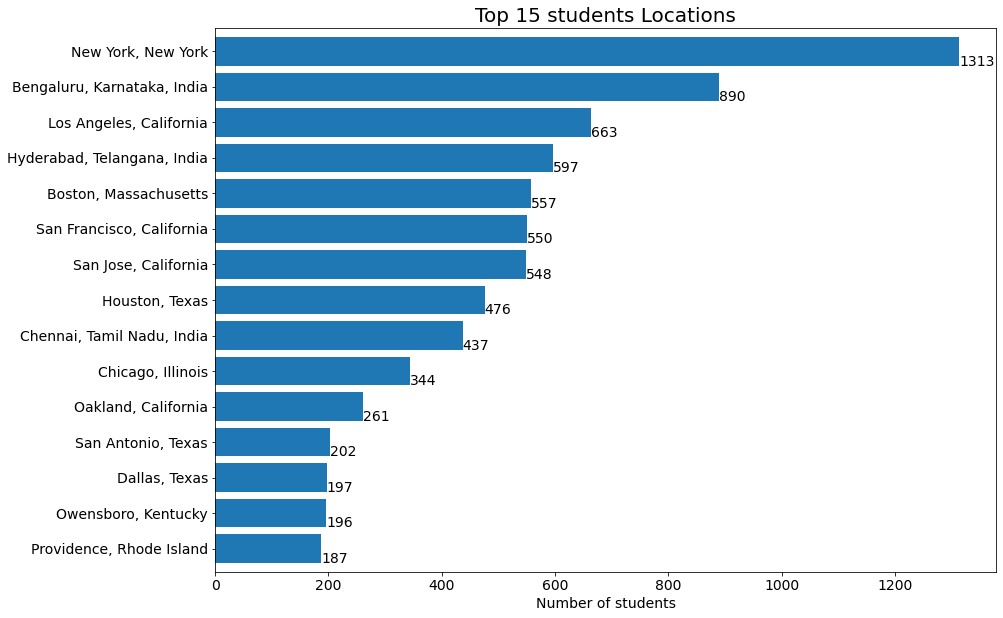

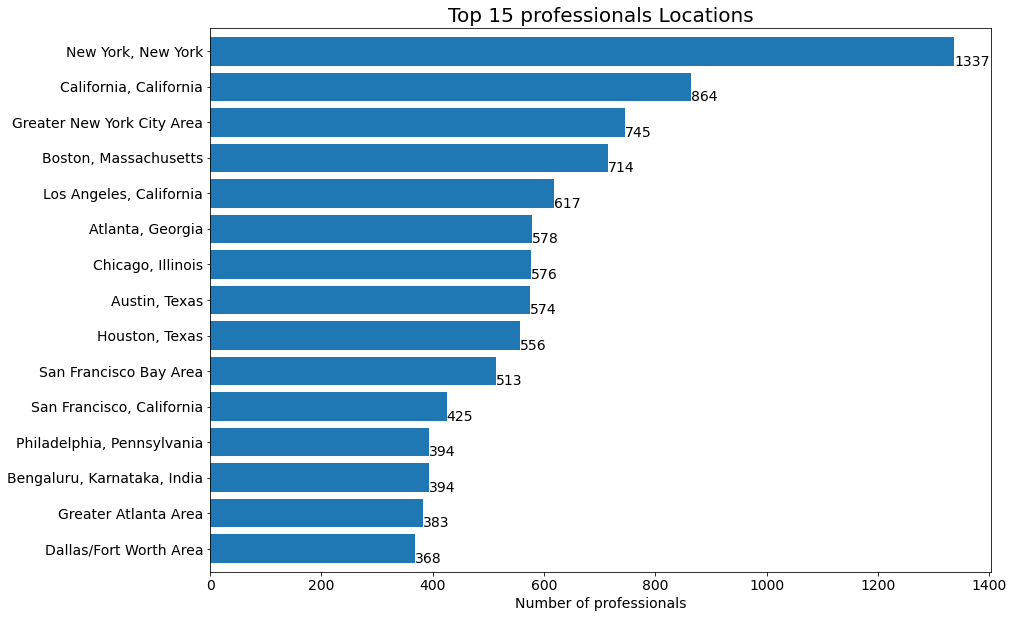

In [87]:
users = [('students',students),('professionals',professionals)]
for user,df in users:
    locations = df[f'{user}_location'].value_counts().sort_values(ascending = True).tail(15)
    graph = locations.plot.barh(figsize = (14,10),width = 0.8,fontsize = 14)
    graph.set_title(f'Top 15 {user} Locations',fontsize = 20)
    graph.set_xlabel(f'Number of {user}',fontsize = 14)
    for b in graph.patches:
        graph.annotate(str(b.get_width()),(b.get_width(),b.get_y()),fontsize = 14)
    plt.show()

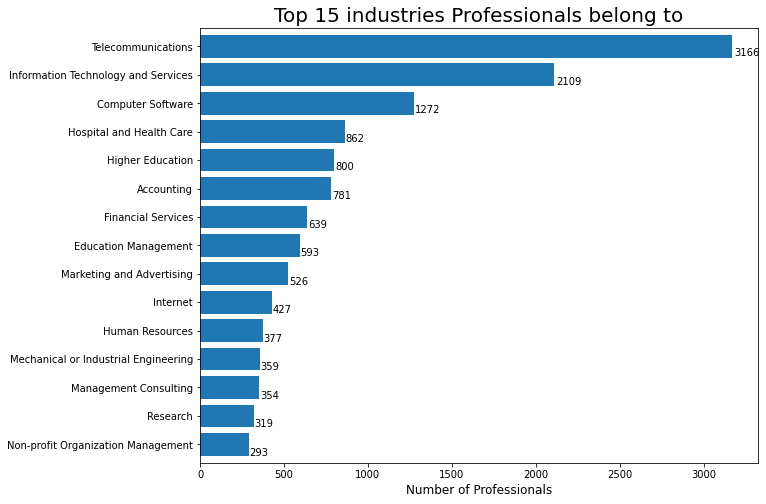

In [288]:
professionals_industries = professionals.professionals_industry.value_counts().sort_values(ascending=True).tail(15)
ax = professionals_industries.plot(kind='barh',figsize=(10, 8),width=0.8) 
ax.set_title("Top 15 industries Professionals belong to", fontsize=20)
ax.set_xlabel('Number of Professionals', fontsize=12)
for p in ax.patches:
     ax.annotate(str(p.get_width()), (p.get_width() * 1.005, p.get_y() * 1.005))

Earliest Date joined by students is 2011-12-16 14:19:24+00:00
Most recent date joined by students is 2019-01-31 23:13:23+00:00
   years  Users
0  2011   2    
1  2012   453  
2  2013   570  
3  2014   1722 
4  2015   2576 
5  2016   12108
6  2017   5535 
7  2018   7748 
8  2019   257  


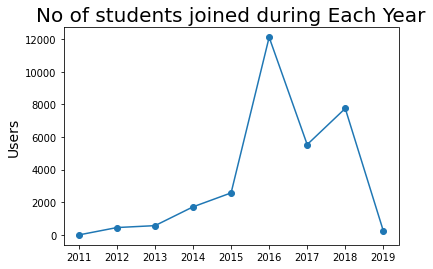

   years  Users
0  2011   2    
1  2012   455  
2  2013   1025 
3  2014   2747 
4  2015   5323 
5  2016   17431
6  2017   22966
7  2018   30714
8  2019   30971


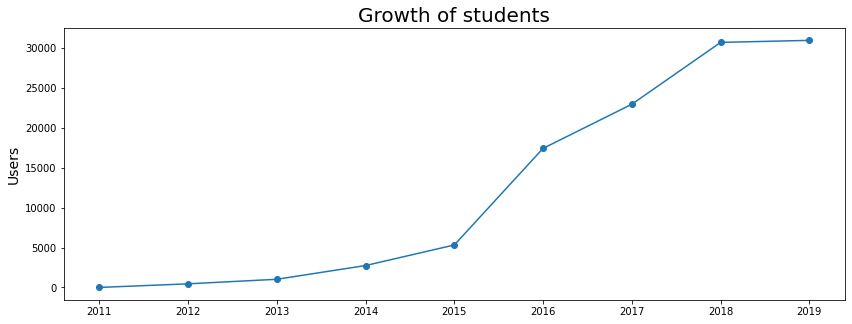

Earliest Date joined by professionals is 2011-10-05 20:35:19+00:00
Most recent date joined by professionals is 2019-01-31 23:59:09+00:00
   years  Users
0  2011   57   
1  2012   222  
2  2013   429  
3  2014   987  
4  2015   1540 
5  2016   5618 
6  2017   6322 
7  2018   11572
8  2019   1405 


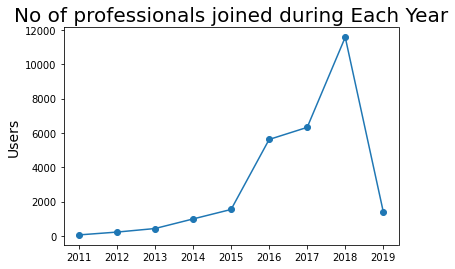

   years  Users
0  2011   57   
1  2012   279  
2  2013   708  
3  2014   1695 
4  2015   3235 
5  2016   8853 
6  2017   15175
7  2018   26747
8  2019   28152


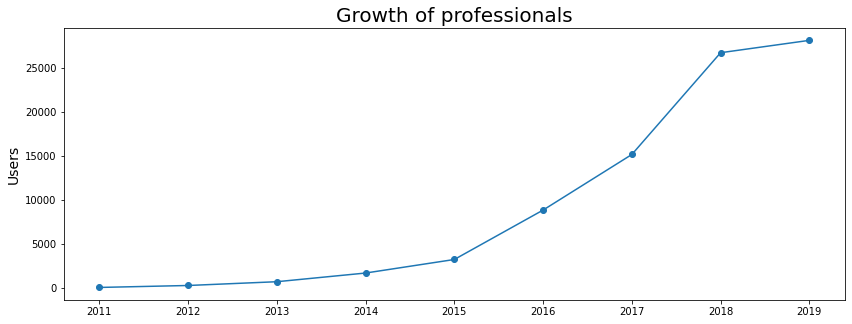

In [88]:
for user,df in users:
    years = df[f'{user}_date_joined'].dt.year.unique()
    years.sort
    earliest_date = df[f'{user}_date_joined'].min()
    print(f'Earliest Date joined by {user} is {earliest_date}')
    earliest_date = earliest_date.strftime("%B %Y")
    recent_date = df[f'{user}_date_joined'].max()
    print(f'Most recent date joined by {user} is {recent_date}') 
    recent_date = recent_date.strftime("%B %Y")
    NoOfUsers = [len(df[df[f'{user}_date_joined'].dt.year == y])for y in years]
    toplot1 = pd.DataFrame({'years':years,'Users':NoOfUsers})
    print(toplot1)
    plt.plot('years','Users',data = toplot1 , marker = 'o')
    x = toplot1['years']
    y = toplot1['Users']
    plt.ylabel('Users',fontsize = 14)
    plt.title(f'No of {user} joined during Each Year',fontsize = 20)
    plt.show()
    for i in range(len(NoOfUsers)):
        if i > 0 :
            NoOfUsers[i] = NoOfUsers[i] + NoOfUsers[i-1]
    toplot = pd.DataFrame({'years':years,'Users':NoOfUsers})
    print(toplot)
    plt.figure(figsize=(14,5))
    plt.plot('years','Users',data = toplot,marker = 'o')
    x = toplot['years']
    y = toplot['Users']
    plt.ylabel('Users',fontsize = 14)
    plt.title(f'Growth of {user}',fontsize = 20)
    plt.show()
        

Earliest date questions was added is 2011-09-27 15:23:17+00:00
Recent date questions was added is 2019-01-31 22:32:00+00:00
year
2011      29
2012     435
2013     157
2014    1007
2015    1466
2016    9281
2017    3255
2018    7994
2019     307
dtype: int64


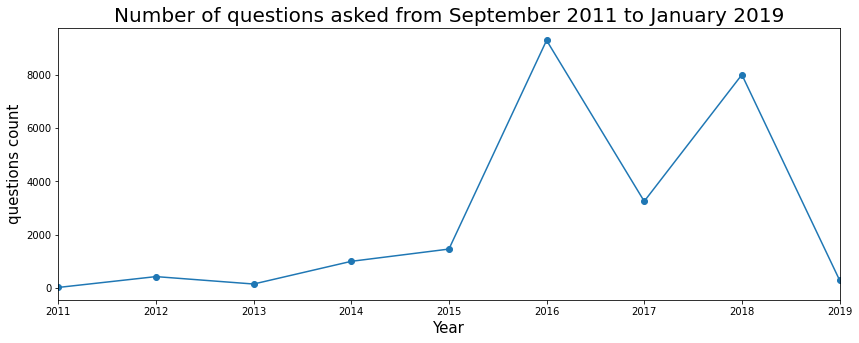

Earliest date answers was added is 2011-10-05 20:33:04+00:00
Recent date answers was added is 2019-01-31 23:47:27+00:00
year
2011       34
2012      692
2013      432
2014     2468
2015     3103
2016    14377
2017    12440
2018    16726
2019      851
dtype: int64


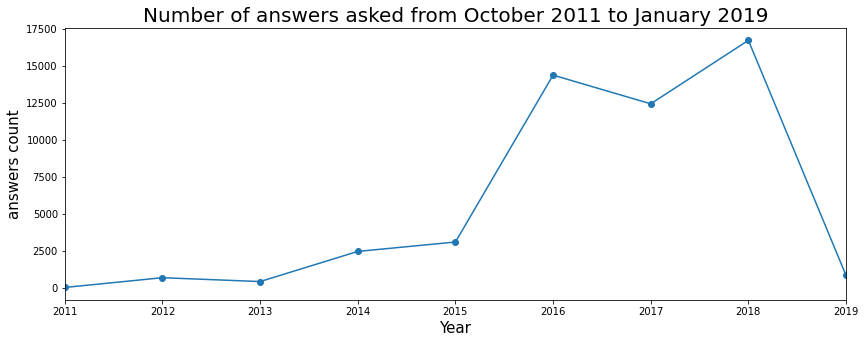

In [78]:
entities = [('questions',questions),('answers',answers)]
for entity,df in entities:
    earliest_date = df[f'{entity}_date_added'].min()
    print(f'Earliest date {entity} was added is {earliest_date}')
    earliest_date = earliest_date.strftime("%B %Y")
    recent_date = df[f'{entity}_date_added'].max()
    print(f'Recent date {entity} was added is {recent_date}')
    recent_date = recent_date.strftime("%B %Y")
    df['year'] = df[f'{entity}_date_added'].dt.year
    countdata = df.groupby('year').size()
    print(countdata)
    countdata.plot(figsize =(14,5),marker = 'o')
    x = countdata.reset_index()['year']
    y = countdata.reset_index()[0]
    plt.xlabel('Year',fontsize = 15)
    plt.ylabel(f'{entity} count',fontsize = 15)
    plt.title(f'Number of {entity} asked from {earliest_date} to {recent_date}',fontsize = 20)
    plt.show()
    

In [79]:
from collections import Counter 

   questions  NoOfStudents
0          1          5811
1          2          5110
2          3           639
3          4           304
4          5            88
5          6           102
6          7            50
7          8            25
8          9            23
9         10            47


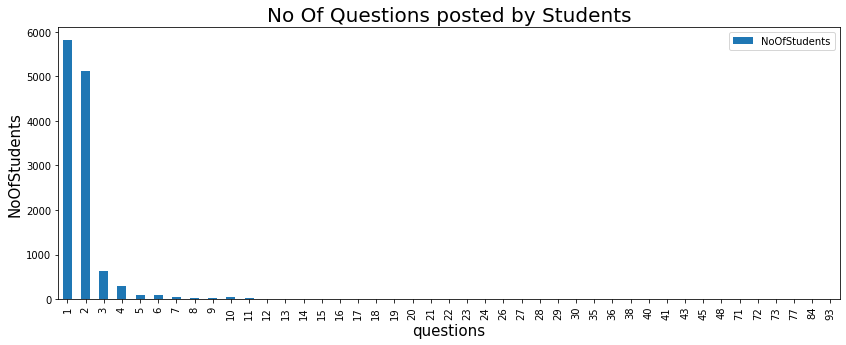

In [85]:
#Merged the questions and students dataframe and grouped them by Students_id and converted to key value pairs
sq=dict(sorted(Counter(pd.merge(students,questions).groupby("students_id").size().values).items()))
#create a dataframe with the key value pairs
sq1 = {}
sq1['questions'] = list(sq.keys())
sq1['NoOfStudents'] = list(sq.values())
sq_df = pd.DataFrame(sq1)
print(sq_df.head(10))
sq_df.plot('questions','NoOfStudents',kind = 'bar',figsize = (14,5))
plt.xlabel('questions',fontsize = 15)
plt.ylabel('NoOfStudents',fontsize = 15)
plt.title('No Of Questions posted by Students',fontsize = 20)
plt.show()


In [86]:
questionsgroup = questions.groupby("students_id")["questions_id"].count()
print(f'Mean Number of questions asked by each student : {questionsgroup.mean()}')
print(f'Minimum Number of questions asked by a student : {questionsgroup.min()}')
print(f'Maximum Number of questions asked by a student : {questionsgroup.max()}')


Mean Number of questions asked by each student : 1.941033336036986
Minimum Number of questions asked by a student : 1
Maximum Number of questions asked by a student : 93


In [87]:
questionsgroup.nlargest(10)

students_id
2fe767de78fa4dfd83f0021cf7712064    93
45852d7b04fd40a0b8e3d92c8a37aad0    84
867e779f9dad4020925e986151ca4be4    77
83f2f05cbbfe4b8c88b9758c15ab803a    73
0a49a80de472412988aac14f93b06374    72
ef401e9115574bad94b773b4244f37cc    71
803037dbdf424a13895161723fb1e88a    48
94cf86c4b2ed40d6ad21cfd3f8b01ece    45
b4656e510759496fb570b582b803a54e    43
eb49a3a84aba4dd1bd7671860e007fa2    41
Name: questions_id, dtype: int64

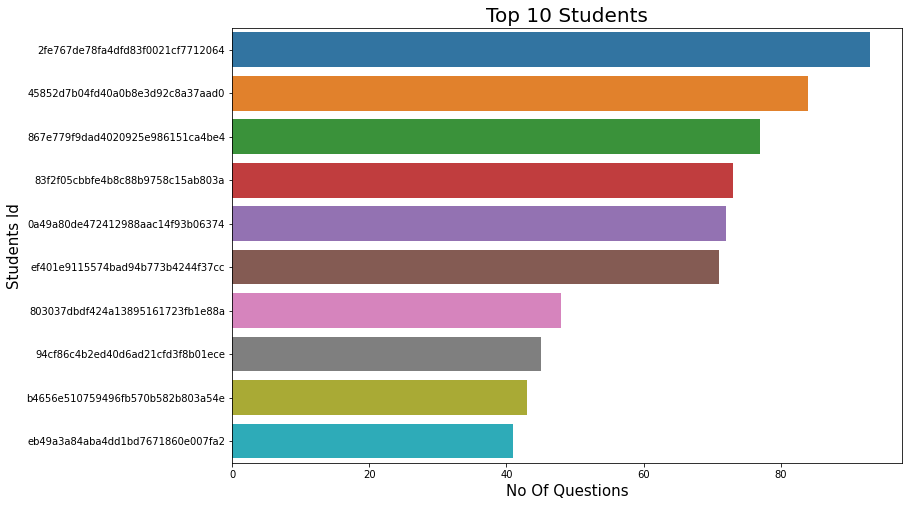

In [88]:
ques_count = questions["students_id"].value_counts().head(10)
plt.figure(figsize=(12,8))
sns.barplot(ques_count.values, ques_count.index)
plt.xlabel("No Of Questions", fontsize=15)
plt.ylabel("Students Id", fontsize=15)
plt.title("Top 10 Students",fontsize = 20)
plt.show()

   answers  NoOfProfessionals
0        1               4225
1        2               1862
2        3               1084
3        4                652
4        5                478
5        6                318
6        7                207
7        8                157
8        9                115
9       10                135


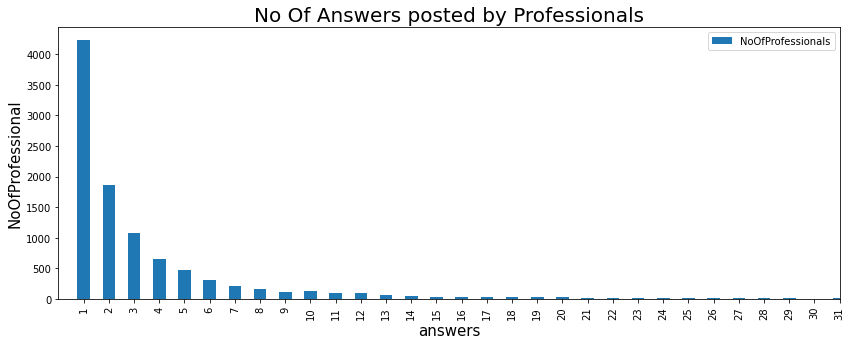

In [89]:
#Merged the answers and professionals dataframe and grouped them by professionals_id and converted to key value pairs
pa=dict(sorted(Counter(pd.merge(professionals,answers).groupby("professionals_id").size().values).items()))
#create a dataframe with the key value pairs
pa1 = {}
pa1['answers'] = list(pa.keys())
pa1['NoOfProfessionals'] = list(pa.values())
pa_df = pd.DataFrame(pa1)
print(pa_df.head(10))
pa_df.plot('answers','NoOfProfessionals',kind = 'bar',figsize = (14,5))
plt.xlabel('answers',fontsize = 15)
plt.ylabel('NoOfProfessional',fontsize = 15)
plt.title('No Of Answers posted by Professionals',fontsize = 20)
plt.xlim(-1,30)
plt.show()

In [90]:
answersgroup = answers.groupby("professionals_id")["answers_id"].count()
print(f'Mean Number of questions answered by each professional : {answersgroup.mean()}')
print(f'Minimum Number of questions answered by each professional : {answersgroup.min()}')
print(f'Maximum Number of questions answered by a professional : {answersgroup.max()}')


Mean Number of questions answered by each professional : 5.0273379880027536
Minimum Number of questions answered by each professional : 1
Maximum Number of questions answered by a professional : 1710


In [91]:
answersgroup.nlargest(10)

professionals_id
36ff3b3666df400f956f8335cf53e09e    1710
58fa5e95fe9e480a9349bbb1d7faaddb    1112
a1006e6a58a0447592e2435caa230f78     915
be5d23056fcb4f1287c823beec5291e1     711
05ab77d4c6a141b999044ebbf5415b0d     616
369f1c8646b649f6997eae7809696bd5     406
a6d33c38902546849c36ea7e9e9f0870     259
05444a2f42454327b2ac4b463c0adbe0     257
4dc61581ec7b409bbd037e483f53ba0a     217
c3b4e11154f74a858779be7ba9b6f00c     210
Name: answers_id, dtype: int64

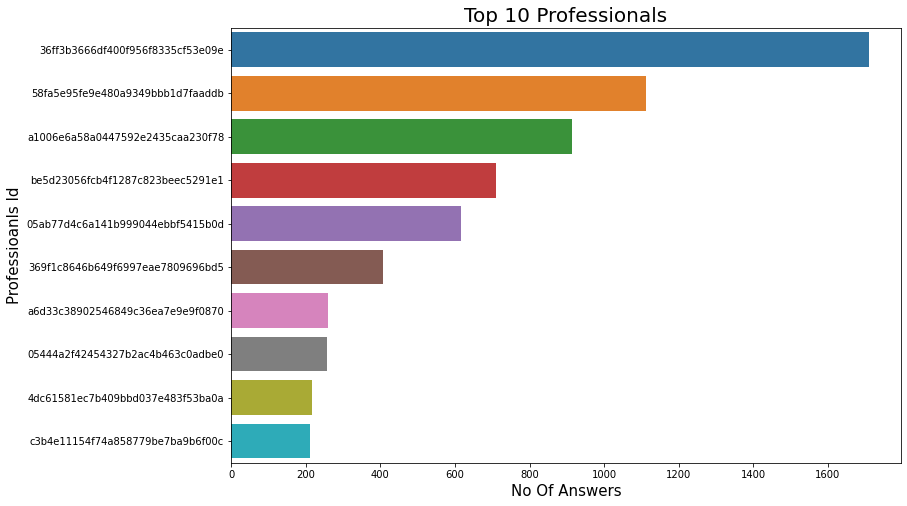

In [92]:
ans_count = answers["professionals_id"].value_counts().head(10)
plt.figure(figsize=(12,8))
sns.barplot(ans_count.values, ans_count.index)
plt.xlabel("No Of Answers", fontsize=15)
plt.ylabel("Professioanls Id", fontsize=15)
plt.title("Top 10 Professionals",fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Days for first answers')

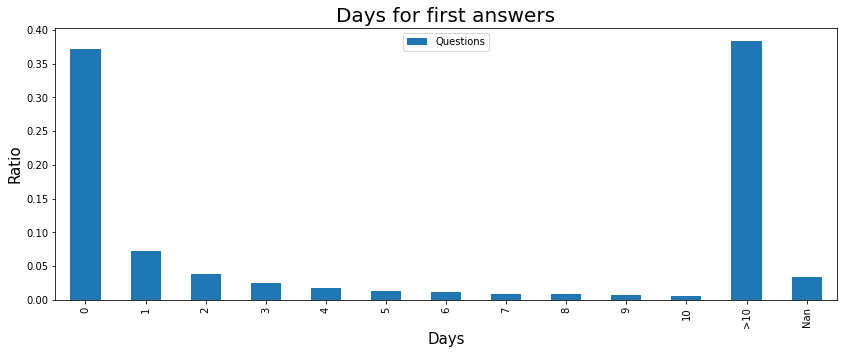

In [93]:
df = questions
min_date = '01-01-2011'
max_date = '01-01-2019'
temp = answers[['questions_id','answers_date_added']].groupby('questions_id').min()
df['questions_first_answers'] = pd.merge(questions,pd.DataFrame(temp),left_on = 'questions_id',right_index = True,how = 'left')['answers_date_added']
df = ((df['questions_first_answers']-df['questions_date_added']).dt.days).fillna(10000).astype(int)
#print(df)
#print(df.groupby(df).size())
#print(len(df.index))
df = df.groupby(df).size()/len(df.index)
df = df.rename(lambda x: 0 if x < 0 else x)
df = df.rename(lambda x: x if x <= 10 or x== 10000 else '>10')
df = df.rename({10000:'Nan'})
df = df.groupby(level = 0).sum()
ques = pd.DataFrame({'Questions':df})
ques.plot(kind = 'bar',figsize = (14,5))
plt.xlabel('Days',fontsize = 15)
plt.ylabel('Ratio',fontsize = 15)
plt.title('Days for first answers',fontsize = 20)

In [97]:
print("Intersting Statistics")
print(f'{answers["questions_id"].nunique()/len(questions) * 100:0.2f}% of the questions have at least 1 answer.')
count_questions_tags = tag_questions.groupby('questions_id').count().rename(columns = {'tags_id':'count_tags'}).sort_values('count_tags',ascending = False)
print(f'{(len(count_questions_tags)/len(questions))*100:0.2f}% of questions are tagged by atleast {count_questions_tags["count_tags"].tail(1).values[0]} tag.')
print(f'Mean number of tags per question :{count_questions_tags["count_tags"].mean():.2f} tags per question.')
users_who_follow_tags = list(tag_users['user_id'].unique())
nbr_prof_tags = len(professionals[professionals.index.isin(users_who_follow_tags)])
nbr_studs_tags = len(students[students.index.isin(users_who_follow_tags)])
print(f'{(nbr_prof_tags/len(professionals))*100:0.2f} % of the professionals follow at least 1 Tag ({nbr_prof_tags}).')  
print(f'{(nbr_studs_tags/len(students))*100:0.2f} % of the students follow at least 1 Tag ({nbr_studs_tags})')

Intersting Statistics
96.57% of the questions have at least 1 answer.
97.31% of questions are tagged by atleast 1 tag.
Mean number of tags per question :3.29 tags per question.
90.91 % of the professionals follow at least 1 Tag (25594).
14.88 % of the students follow at least 1 Tag (4608)


Modelling

Model 1

In [109]:
questions["timestamp"] = questions.apply(lambda x:to_date(x['questions_date_added']),axis = 1)
questions["year"]=questions.apply(lambda x: to_year(x['timestamp']),axis=1)
questions['month']=questions.apply(lambda x: to_yr_mon(x['timestamp']),axis=1)

In [114]:
questions.head(3).T

,0,1,2
questions_id,332a511f1569444485cf7a7a556a5e54,eb80205482e4424cad8f16bc25aa2d9c,4ec31632938a40b98909416bdd0decff
students_id,8f6f374ffd834d258ab69d376dd998f5,acccbda28edd4362ab03fb8b6fd2d67b,f2c179a563024ccc927399ce529094b5
questions_date_added,2016-04-26 11:14:26+00:00,2016-05-20 16:48:25+00:00,2017-02-08 19:13:38+00:00
questions_title,Teacher career question,I want to become an army officer. What can I do to become an army officer?,Will going abroad for your first job increase your chances for jobs back home?
questions_body,What is a maths teacher? what is a maths teacher useful? #college #professor #lecture,I am Priyanka from Bangalore . Now am in 10th std . When I go to college I should not get confused on what I want to take to become army officer. So I am asking this question #military #army,"I'm planning on going abroad for my first job. It will be a teaching job and I don't have any serious career ideas. I don't know what job I would be working if I stay home instead so I'm assuming staying or leaving won't makeba huge difference in what I care about, unless I find something before my first job. I can think of ways that going abroad can be seen as good and bad. I do not know which side respectable employers willl side with. #working-abroad #employment- #overseas"
year,2016,2016,2017
questions_first_answers,2016-04-29 19:40:14+00:00,2018-05-01 14:19:08+00:00,2017-05-10 19:00:47+00:00
timestamp,2016-04-26 11:14:26,2016-05-20 16:48:25,2017-02-08 19:13:38
month,2016-04,2016-05,2017-02


In [89]:
#Check the number of tags for each question
tag_questions.sort_values('questions_id')[:15]

,tags_id,questions_id
12839,1707,0003e7bf48f24b5c985f8fce96e611f3
59166,33630,0003e7bf48f24b5c985f8fce96e611f3
48543,27510,0003e7bf48f24b5c985f8fce96e611f3
29372,27330,0003e7bf48f24b5c985f8fce96e611f3
23735,18073,0003e7bf48f24b5c985f8fce96e611f3
59956,29649,0003e7bf48f24b5c985f8fce96e611f3
43792,18370,0006609dd4da40dcaa5a83e0499aba14
42995,18360,0006609dd4da40dcaa5a83e0499aba14
32359,18156,000af224bc2f4e94a19f8b62ba279cc4
7919,51,000af224bc2f4e94a19f8b62ba279cc4


In [91]:
#Creating Tag-String
tagnames = pd.merge(tag_questions,tags)
tagnames = tagnames.drop(['tags_id'],axis = 1)
print(tagnames.sort_values('questions_id')[:15])
tagnames_pivot = tagnames.pivot_table(index = 'questions_id',values = 'tag_name',aggfunc = lambda x: " ".join(x))
tagnames_pivot.head(10)
#tagnames_pivot["questions_id"] = tagnames_pivot.index

                           questions_id                tag_name
12839  0003e7bf48f24b5c985f8fce96e611f3  internship            
59166  0003e7bf48f24b5c985f8fce96e611f3  majoring              
48543  0003e7bf48f24b5c985f8fce96e611f3  information-technology
29372  0003e7bf48f24b5c985f8fce96e611f3  high-school           
23735  0003e7bf48f24b5c985f8fce96e611f3  technology            
59956  0003e7bf48f24b5c985f8fce96e611f3  time                  
43792  0006609dd4da40dcaa5a83e0499aba14  law                   
42995  0006609dd4da40dcaa5a83e0499aba14  psychology            
32359  000af224bc2f4e94a19f8b62ba279cc4  marine                
7919   000af224bc2f4e94a19f8b62ba279cc4  biology               
30173  000b30fb534b41f7b716fa9ebf9c3f35  exercise-science      
34018  000b30fb534b41f7b716fa9ebf9c3f35  school                
74570  000b30fb534b41f7b716fa9ebf9c3f35  exercise              
5633   000b30fb534b41f7b716fa9ebf9c3f35  teaching              
57042  0018752e44b44e26bb74a0a43232b4d6 

,tag_name
questions_id,
0003e7bf48f24b5c985f8fce96e611f3,internship technology high-school information-technology majoring time
0006609dd4da40dcaa5a83e0499aba14,psychology law
000af224bc2f4e94a19f8b62ba279cc4,biology marine
000b30fb534b41f7b716fa9ebf9c3f35,teaching exercise-science school exercise
0018752e44b44e26bb74a0a43232b4d6,math puremathematics
0025b917219c4a24ba5fe260ca66ca98,forensic criminal-justice college
00269cdc24fd4a3c93aad485688c240b,videogames videogamesmaking gaming
002b07f6281a407ca49ee8b3538e5e45,programming
002c5689a0b642a3940f99b68f5364b6,clinical-psychology psychiatry pre-med psychiatrists


In [92]:
tagnames_pivot['questions_id']=tagnames_pivot.index
print(f'Number of questions asked : {questions["questions_id"].count()} ')
print(f'Number of questions with tags : {len(tagnames_pivot)}')
tagnames_pivot = tagnames_pivot.reset_index(drop = True)

Number of questions asked : 23931 
Number of questions with tags : 23288


In [163]:
print(f'Example :- \nQuestionsId : {tagnames_pivot.iloc(0)[0]["questions_id"]}')
print(f'QuestionBody : {questions.loc[questions["questions_id"] == tagnames_pivot.iloc(0)[0]["questions_id"]]["questions_body"]}')
print(f'TagNames : {tagnames_pivot.iloc(0)[0]["tag_name"]}')      

Example :- 
QuestionsId : 0003e7bf48f24b5c985f8fce96e611f3
QuestionBody : 6150    I am a Junior in H.S. right now i am thinking about doing a double major in my tech academy, they have a guaranteed internship if you do this. But i am thinking if its worth it. Two tech classes back to back for the whole senior year. I take college classes at my nearest community college, so i know for a fact that i don't have soo much time to give to something that will not gonna help me or its worth it. \n\n#information-technology  #majoring  #technology \n#internship #time #high-school 
Name: questions_body, dtype: object
TagNames : internship technology high-school information-technology majoring time


In [93]:
#Combining questions with corresponding tags
questions_tags = pd.merge(questions,tagnames_pivot)
print(f'Number of questions with tags : {len(questions_tags)}')
questions_tags.head(3).T

Number of questions with tags : 23288


,0,1,2
questions_id,332a511f1569444485cf7a7a556a5e54,eb80205482e4424cad8f16bc25aa2d9c,4ec31632938a40b98909416bdd0decff
students_id,8f6f374ffd834d258ab69d376dd998f5,acccbda28edd4362ab03fb8b6fd2d67b,f2c179a563024ccc927399ce529094b5
questions_date_added,2016-04-26 11:14:26+00:00,2016-05-20 16:48:25+00:00,2017-02-08 19:13:38+00:00
questions_title,Teacher career question,I want to become an army officer. What can I do to become an army officer?,Will going abroad for your first job increase your chances for jobs back home?
questions_body,What is a maths teacher? what is a maths teacher useful? #college #professor #lecture,I am Priyanka from Bangalore . Now am in 10th std . When I go to college I should not get confused on what I want to take to become army officer. So I am asking this question #military #army,"I'm planning on going abroad for my first job. It will be a teaching job and I don't have any serious career ideas. I don't know what job I would be working if I stay home instead so I'm assuming staying or leaving won't makeba huge difference in what I care about, unless I find something before my first job. I can think of ways that going abroad can be seen as good and bad. I do not know which side respectable employers willl side with. #working-abroad #employment- #overseas"
tag_name,lecture college professor,military army,overseas working-abroad


In [94]:
#Combine QuestionTitle,Body and Tagnames
questions_corpus = questions_tags["questions_title"] + questions_tags["questions_body"] + questions_tags["tag_name"]
questions["text"] = questions_tags["questions_title"] + questions_tags["questions_body"] + questions_tags["tag_name"]
questions_corpus.head(2)

0    Teacher   career   questionWhat  is  a  maths  teacher?   what  is  a  maths  teacher  useful? #college #professor #lecturelecture college professor                                                                                                                                  
1    I want to become an army officer. What can I do to become an army officer?I am Priyanka from Bangalore . Now am in 10th std . When I go to college I should not get confused on what I want to take to become army officer. So I am asking this question  #military #armymilitary army
dtype: object

In [95]:
#Text Processing
#Tokenizing Data
gen_docs = [[w.lower() for w in word_tokenize(text)] for text in questions_corpus]
#Creating Dictionary
dictionary = gensim.corpora.Dictionary(gen_docs)
print(dictionary)
#To see the unique ids 
#print(dictionary.token2id)
#Creating Document-Term Matrix
#The words are replaced with their ids.
#The corpus contains the word id and the frequency of the word in each document
corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]

Dictionary(34586 unique tokens: ['#', '?', 'a', 'career', 'college']...)


In [2]:
# Show the Word Weights in Corpus
#for doc in corpus:
    #print([[dictionary[id], freq] for id, freq in doc])

In [197]:
#Create TF-IDF Model
tfidf = gensim.models.TfidfModel(corpus)

In [1]:
# Show the TF-IDF weights
#for doc in tfidf[corpus]:
   # print([[dictionary[id], np.around(freq, decimals=2)] for id, freq in doc])
#words that occur more frequently across the documents get smaller weights.    

In [201]:
#Creating Similarity Checker
similarquestions = gensim.similarities.Similarity("",tfidf[corpus],num_features=len(dictionary))

In [202]:
similarquestions

In [326]:
#Taking a question which is included in the training set 
Query='What is the best way to finance a law degree?. #law #law-practice #law-school'
Query

'What is the best way to finance a law degree?. #law #law-practice #law-school'

In [327]:
query_dict = [w.lower() for w in word_tokenize(Query)]
query_corpus = dictionary.doc2bow(query_dict)
query_tfidf = tfidf[query_corpus]

In [329]:
query_similar = similarquestions[query_tfidf]

In [330]:
query_similar

array([0.00606094, 0.00310916, 0.00242189, ..., 0.00219751, 0.2111287 ,
       0.0130461 ], dtype=float32)

In [294]:
similaritythreshold = 0.10

In [331]:
#Displaying the most similar questions from past
questions_tags["Similarity"] = query_similar
ques = questions_tags[questions_tags["Similarity"]>= similaritythreshold]
ques = ques.sort_values("Similarity",ascending = False)

In [358]:
ques.head()

,questions_id,students_id,questions_date_added,questions_title,questions_body,year,questions_first_answers,timestamp,month,tag_name,Similarity
7387,67b6b1157a534cbfb4d2eba404a39788,8d08d1b5899042989248fa90b1dcd823,2018-03-20 18:17:13+00:00,What is the best way to finance a law degree?,if I decide to go to Law School.\r\n#law #law-school #law-practice,2018,2018-04-16 01:34:05+00:00,2018-03-20 18:17:13,2018-03,law law-practice law-school,0.954100
1443,f40dc76a7a5844f3bc71da9f391688e6,da465f7336314ca89802ccfe6059bef9,2018-07-13 19:46:08+00:00,what is law school like an how does it work?,do you go to regular college an then law school or just law school ? #law-practice,2018,2018-07-14 03:05:14+00:00,2018-07-13 19:46:08,2018-07,law-practice,0.655246
10232,360ca20467f9477791d71082670b3506,a321c16494714ee9964a24c5a66b9b33,2018-07-16 20:46:15+00:00,Do you need a law degree to become a lawyer?,#lawyer #law #law-practice #degree #major,2018,2018-07-17 01:08:05+00:00,2018-07-16 20:46:15,2018-07,lawyer law degree major law-practice,0.626301
9582,12e1fdb2a2994e978ea00c61b9dc0ab5,9ecea03af91f42749353c7026d3d8c7c,2018-08-27 16:03:29+00:00,How long will I be paying off my college debt if I go for an undergrad and law school?,#law #law-school #law-school,2018,2018-09-04 22:28:56+00:00,2018-08-27 16:03:29,2018-08,law law-school,0.600466
18116,d5d76a1d44734cd08d629fa9b686a0d2,5851eaf461fa4794b756cd771d724ea6,2017-09-01 00:57:21+00:00,What would be the best major for me if I wanted to go to law school?,"I want to go to law school, and I want the best chance at getting in #law-school",2017,2017-09-11 13:43:15+00:00,2017-09-01 00:57:21,2017-09,law-school,0.579862


In [220]:
#Identify Professionals who answered These questions
questionslist = ques["questions_id"]
questionslist_answers = answers[answers["questions_id"].isin(questionslist)]
#professionals who answered
answeredprofessionals = set(questionslist_answers["professionals_id"])

In [224]:
solution = professionals[professionals["professionals_id"].isin(answeredprofessionals)]

In [225]:
solution.head(4)

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
11,7daf1e6dfb3443b99b240890f0a4d69b,NaN,NaN,NaN,2011-12-26 05:00:00 UTC+0000
28,8e75aca48b434c79b8b4729ef871cb50,"Boston, Massachusetts",NaN,NaN,2011-12-26 05:00:00 UTC+0000
49,8fa038d69f5647a091c766bf460d2616,NaN,NaN,NaN,2011-12-26 05:00:00 UTC+0000
206,29066f5ff3504a91bb7bb304ae6890cb,NaN,NaN,NaN,2012-09-09 04:51:58 UTC+0000


Model 2

In [341]:
#Identify Professionals with tags most similar to the questions asked.
user_tags = pd.merge(tag_users,tags)
user_tags = user_tags.drop(["tags_id"],axis = 1)
user_tags.sort_values("user_id")[:10]

,user_id,tag_name
15231,00009a0f9bda43eba47104e9ac62aff5,digital-media
113935,00009a0f9bda43eba47104e9ac62aff5,content-creation
109389,00009a0f9bda43eba47104e9ac62aff5,script-writing
4982,000196ef8db54b9a86ae70ad31745d04,accounting
54407,0008138be908438e8944b21f7f57f2c1,real-estate
18163,000d4635e5da41e3bfd83677ee11dda4,college
82628,000d4635e5da41e3bfd83677ee11dda4,information-technology
50407,000d4635e5da41e3bfd83677ee11dda4,university
30335,000e2b5714444d79a672bf927905135c,financial-services
30412,0018873fbf7742aba1bf13fff12cbfa4,financial-services


In [344]:
#The first user has 3 tags.This means that one user can have many tags 
#Concatenate all tags of a user to form a tag-string
tag_pivot = user_tags.pivot_table(values = "tag_name",index="user_id",aggfunc = lambda x : " ".join(x))
tag_pivot["user_id"] = tag_pivot.index
print("Number of all users with tags:",len(tag_pivot))
tag_pivot=tag_pivot.reset_index(drop=True)
tag_pivot.head()

Number of all users with tags: 30202


,tag_name,user_id
0,digital-media script-writing content-creation,00009a0f9bda43eba47104e9ac62aff5
1,accounting,000196ef8db54b9a86ae70ad31745d04
2,real-estate,0008138be908438e8944b21f7f57f2c1
3,college university information-technology,000d4635e5da41e3bfd83677ee11dda4
4,financial-services,000e2b5714444d79a672bf927905135c


In [347]:
#Filtering only the professionals from all the users
prof_tags= tag_pivot[tag_pivot['user_id'].isin(professionals['professionals_id'])]
print("Number of professionals with tags:",len(prof_tags))
raw_tags = prof_tags["tag_name"]

Number of professionals with tags: 25594


In [349]:
#TextProcessing
gen_docs = [[w.lower() for w in word_tokenize(text)] for text in raw_tags]
#Creating Dictionary
dictionary = gensim.corpora.Dictionary(gen_docs)
#print(dictionary)
#To see the unique ids 
#print(dictionary.token2id)
#Creating Document-Term Matrix
#The words are replaced with their ids.
#The corpus contains the word id and the frequency of the word in each document
corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]

In [350]:
tf_idf = gensim.models.TfidfModel(corpus)
sims = gensim.similarities.Similarity("",tf_idf[corpus],num_features=len(dictionary))

In [354]:
#For the same query
query_doc = [w.lower() for w in word_tokenize(Query)]
query_doc_bow = dictionary.doc2bow(query_doc)
query_doc_tf_idf = tf_idf[query_doc_bow]


In [355]:
sim=sims[query_doc_tf_idf]

In [356]:
prof_tags['sim']=sim
prof_tag=prof_tags[prof_tags['sim']>=0.10]
prof_tag=prof_tag.sort_values('sim',ascending=False)
prof_tag.head()

C:\Users\meril\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tag_name,user_id,sim
16021,law law-school law-practice,895b1656666d41768548609bc7ee4e3f,0.441358
15650,law law-school law-practice,86128190605c4166a9cc898051ab0fe1,0.441358
21069,law law-school law-practice,b3db686333aa40b58a53f7453f37436d,0.441358
19050,law,a29a00819ec8466c94c7d8c9137a129b,0.365144
22692,law,c16ee388eb1c4d05a21b1e25b064b787,0.365144
